<a href="https://colab.research.google.com/github/cagBRT/RNNs/blob/main/1_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!git clone -l -s https://github.com/cagBRT/RNNs.git cloned-repo
%cd cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 49 (delta 18), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (49/49), done.
/content/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo


In [68]:
from IPython.display import Image

This article explains RNNs - no code:

https://machinelearningmastery.com/crash-course-recurrent-neural-networks-deep-learning/

pre requisite:
https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them/

Recall the architecture of the forward feed network.<br>
An input layer, hidden layer or layers, and an output layer. The direction of information is always input to output. 

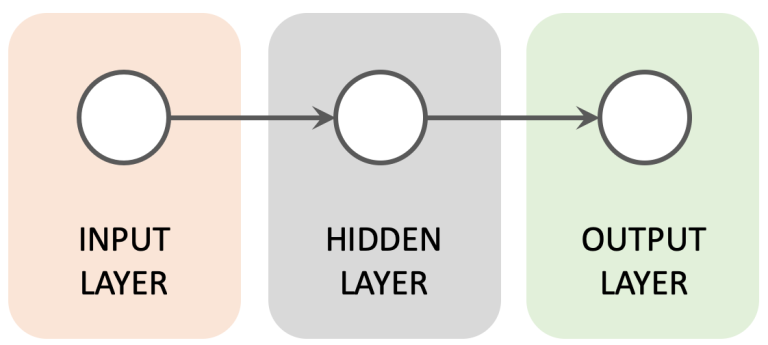

In [69]:
Image("/content/cloned-repo/cloned-repo/images/forwardFeedArch.png" , width=640)

A recurrent neural network (RNN) is a special type of an artificial neural network adapted to work for time series data or data that involves sequences

Data in a sequence such that one data point depends upon the previous data point, we need to modify the neural network to incorporate the dependencies between these data points. RNNs have the concept of ‘memory’ that helps them store the states or information of previous inputs to generate the next output of the sequence.

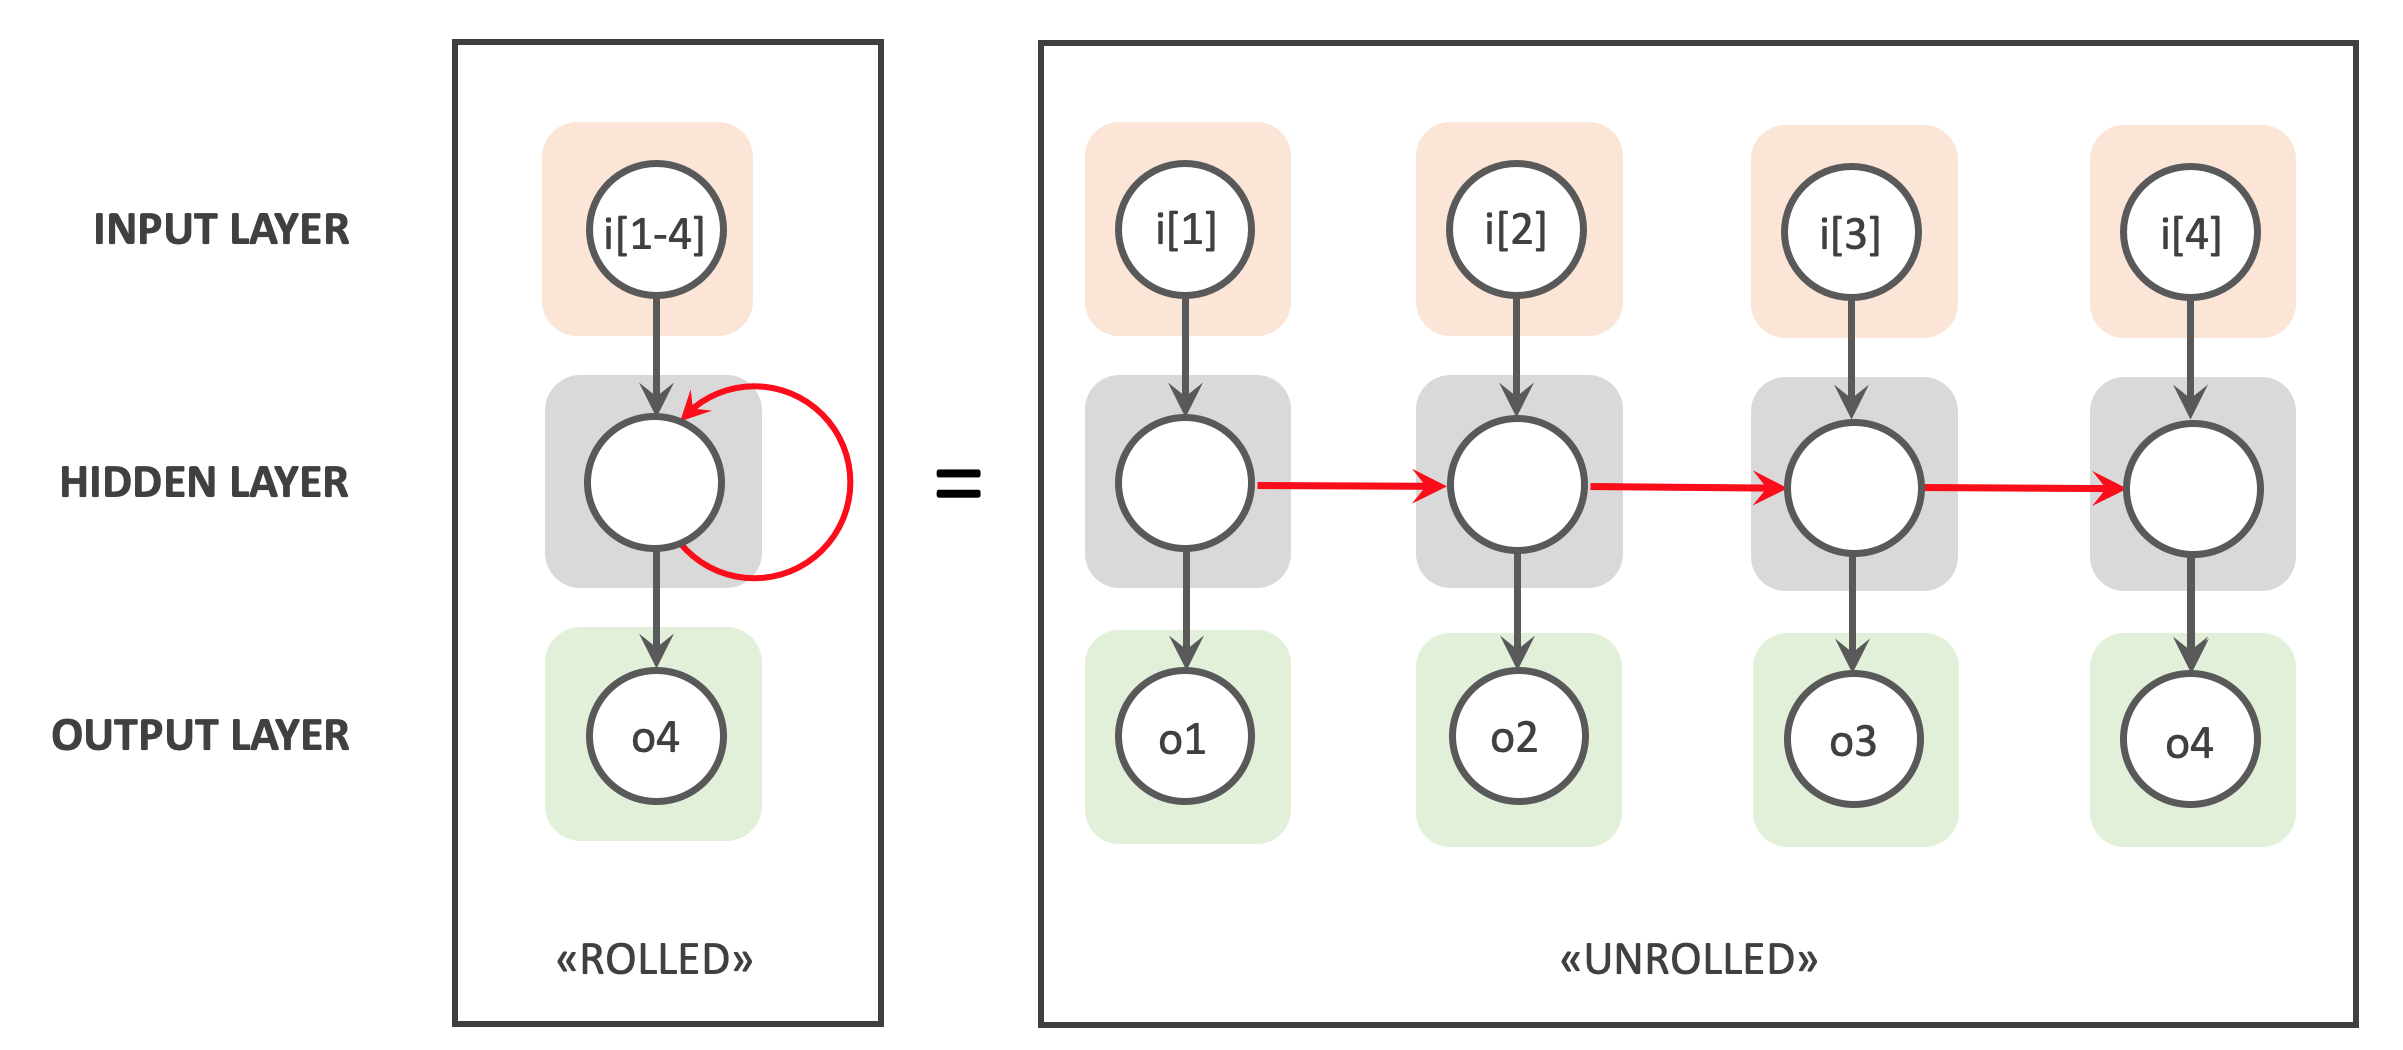

In [70]:
Image("/content/cloned-repo/cloned-repo/images/RNN.png" , width=640)

A simple RNN has a feedback loop as shown in the first diagram of the above figure. The feedback loop shown in the gray rectangle can be unrolled in 3 time steps to produce the second network of the above figure. Of course, you can vary the architecture so that the network unrolls  time steps. 

At every time step we can unfold the network for  time steps to get the output at each time step 

in the feedforward pass of a RNN, the network computes the values of the hidden units and the output after  time steps. The weights associated with the network are shared temporally. Each recurrent layer has two sets of weights; one for the input and the second one for the hidden unit. T

In [83]:
Image("/content/images/RNNCloseUp.png" , width=640)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

The last feedforward layer, which computes the final output for the kth time step is just like an ordinary layer of a traditional feedforward network.

We can use any activation function we like in the recurrent neural network.<br>

Common choices are:
*   Sigmoid function
*   Tanh function
*   Relu function





In [72]:
Image("/content/cloned-repo/images/activationFunctions.png" , width=640)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

The backpropagation algorithm of an artificial neural network is modified to include the unfolding in time to train the weights of the network. This algorithm is based on computing the gradient vector and is called back propagation in time or BPTT algorithm for short

Repeat till stopping criterion is met:<BR>
Set all  to zero.<BR>
Repeat for t = 0 to n-k<BR>
1. Forward propagate the network over the unfolded network for  time steps to compute all  and .
2. Compute the error as: 
3. Backpropagate the error across the unfolded network and update the weights.

Types of RNNs<br>
>One-to-one<br>
One-to-many<br>
Many-to-one<br>
Many-to-many<br>

In [73]:
Image("/content/cloned-repo/images/rnnsAchitectures.png" , width=640)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

RNNs have various advantages such as:<br>

* Ability to handle sequence data.<br>
* Ability to handle inputs of varying lengths.<br>
* Ability to store or ‘memorize’ <br>historical information.<br>





The disadvantages are:<br>

* The computation can be very slow.<br>
* The network does not take into account future inputs to make decisions.<br>
* Vanishing gradient problem, where the gradients used to compute the weight update may get very close to zero preventing the network from learning new weights. The deeper the network, the more pronounced is this problem.


**RNN Architectures**<br>
>BRNN - Bidirectional RNN<br>
GRU - Gated Recurrent Units<br>
LSTM - Long Short Term Memory<br>






https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/?utm_source=drip&utm_medium=email&utm_campaign=An+intro+to+recurrent+neural+networks&utm_content=An+intro+to+recurrent+neural+networks

**Import Libraries**

In [74]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

**Define a function to create the RNN**

In [84]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    #notice with Keras we can use the SimpleRNN model
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

**Get the weights and biases from the model**

The get_weights method returns the current weights of the layer, as NumPy arrays.<br>
Weights and biases are randomly assigned when the model is created.

In [76]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[-0.21862614 -0.13194358]]  wh =  [[-0.8441539  0.536101 ]
 [ 0.536101   0.8441539]]  bh =  [0. 0.]  wy = [[0.5778407]
 [0.7709104]] by =  [0.]


In [77]:
x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)
 
 
m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by
 
print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)
 
print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

h1 =  [[-0.21862614 -0.13194358]] h2 =  [[-0.32343326 -0.49247354]] h3 =  [[-0.64686653 -0.98494709]]
Prediction from network  [[-1.1330917]]
Prediction from our computation  [[-1.13309174]]


https://machinelearningmastery.com/global-attention-for-encoder-decoder-recurrent-neural-networks/


https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/


https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

https://machinelearningmastery.com/crash-course-recurrent-neural-networks-deep-learning/


Runningthe RNN on Sunspots Dataset

1. Read the dataset from a given URL
2. Split the data into training and test set
3. Prepare the input to the required Keras format
4. Create an RNN model and train it
5. Make the predictions on training and test sets and print the root mean square error on both sets
6. View the result


In [78]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [79]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [80]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 2s - loss: 0.0091 - 2s/epoch - 12ms/step
Epoch 2/20
187/187 - 1s - loss: 0.0082 - 668ms/epoch - 4ms/step
Epoch 3/20
187/187 - 1s - loss: 0.0065 - 722ms/epoch - 4ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0054 - 607ms/epoch - 3ms/step
Epoch 5/20
187/187 - 1s - loss: 0.0049 - 670ms/epoch - 4ms/step
Epoch 6/20
187/187 - 1s - loss: 0.0048 - 778ms/epoch - 4ms/step
Epoch 7/20
187/187 - 1s - loss: 0.0045 - 866ms/epoch - 5ms/step
Epoch 8/20
187/187 - 1s - loss: 0.0044 - 676ms/epoch - 4ms/step
Epoch 9/20
187/187 - 1s - loss: 0.0042 - 681ms/epoch - 4ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0042 - 729ms/epoch - 4ms/step
Epoch 11/20
187/187 - 1s - loss: 0.0041 - 827ms/epoch - 4ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0039 - 823ms/epoch - 4ms/step
Epoch 13/20
187/187 - 1s - loss: 0.0038 - 731ms/epoch - 4ms/step
Epoch 14/20
187/187 - 1s - loss: 0.0038 - 811ms/epoch - 4ms/step
Epoch 15/20
187/187 - 1s - loss: 0.0037 - 896ms/epoch - 5ms/step
Epoch 16/20
187/187 - 1s - loss: 0.0

In [81]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.058 RMSE
Test RMSE: 0.085 RMSE


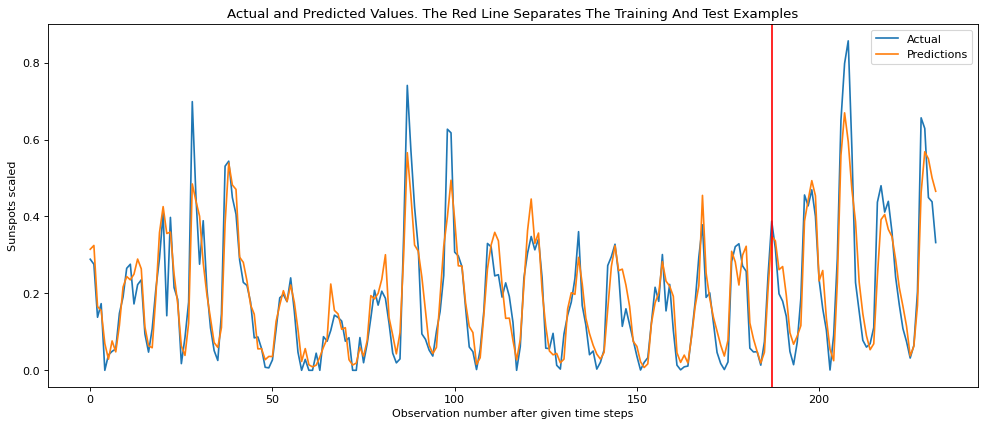

In [82]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)